# Tectonic and Landscape Evolution Class

In [1]:
#importing necessary components
import numpy as np
from landlab import RasterModelGrid, imshow_grid, imshow_grid_at_node
from landlab.components import FlowAccumulator, StreamPowerEroder, SteepnessFinder, ChiFinder, ChannelProfiler
import matplotlib as plt
from bmi_topography import Topography
from bmi_topography import Topography
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt


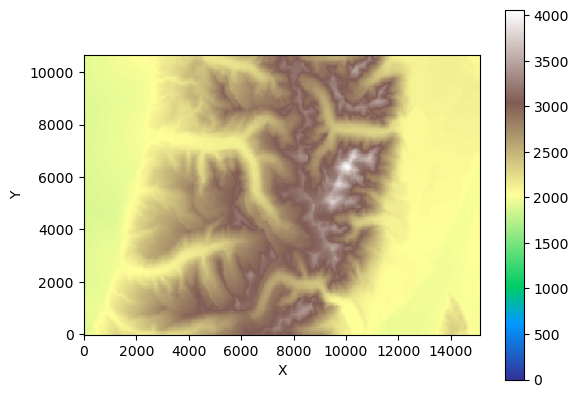

In [2]:
# importing DEM using lat,long from OpenTopo website

the_grand_teton = Topography(north=43.811261, #44.247929,
                             south=43.633050, #43.855, #44.019297,
                             east=-110.661373, #-110.438699,
                             west=-111.082262, #110.935236,
                             output_format="GTiff",
                             dem_type="SRTMGL3",
                             api_key='d15c3831a8ac439bb9337099b91498e0')

the_grand_teton_DEM = the_grand_teton.load()
z = np.flipud(the_grand_teton_DEM.values.squeeze())

grid = RasterModelGrid(z.shape, xy_spacing=(30, 50)) #come back to this bit
grid.at_node["topographic__elevation"] = z/1000*1000
grid.imshow("topographic__elevation", cmap="terrain", vmin=0)

### Here lets save the DEM as a tif for use in another softwares

In [3]:
fa = FlowAccumulator(grid,flow_director='D8')
sf = SteepnessFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)
cf = ChiFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)

In [4]:
fa.run_one_step()

In [5]:
sf.calculate_steepnesses()
cf.calculate_chi()

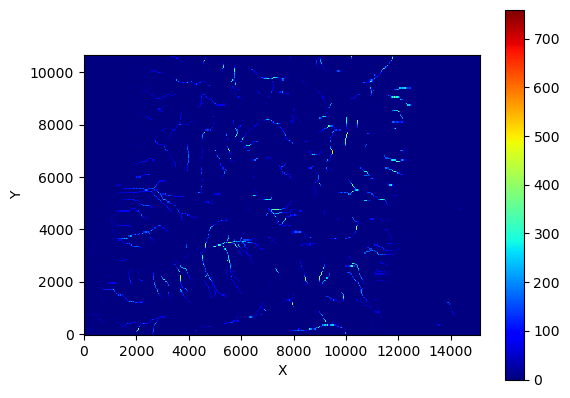

In [6]:
imshow_grid(grid,sf.steepness_indices,cmap="jet",color_for_closed=None)

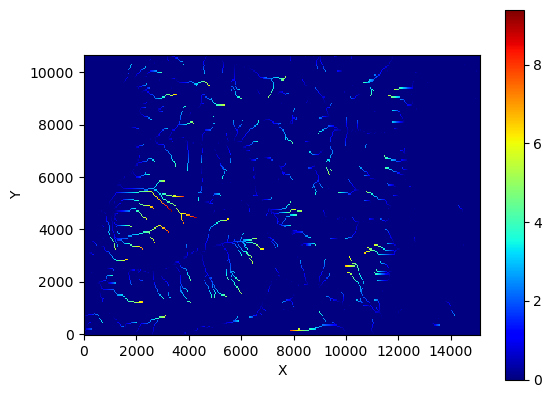

In [7]:
imshow_grid(grid,cf.chi_indices,cmap="jet",color_for_closed=None)

In [8]:
profiler = ChannelProfiler(grid,number_of_watersheds=3)
profiler.run_one_step()

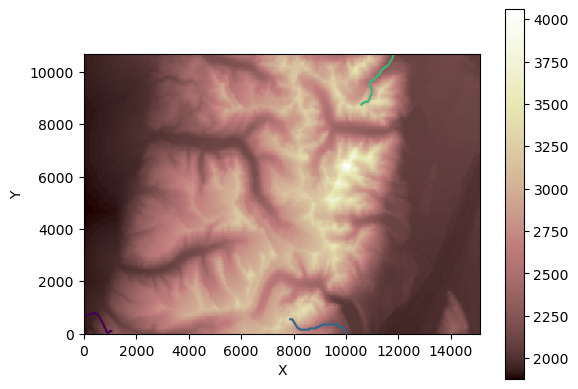

In [9]:
profiler.plot_profiles_in_map_view(field='topographic__elevation')

In [10]:
profiler.data_structure.keys()

odict_keys([6565, 333, 107959])

In [11]:
profiler.data_structure[6565].keys()

dict_keys([(6565, 1046)])

In [12]:
profiler.data_structure[6565][(6565,1046)]["ids"]

array([6565, 6566, 7072, 7073, 7074, 7580, 7581, 7582, 7583, 7584, 7585,
       7586, 7587, 8093, 8094, 7590, 7591, 7592, 7088, 6584, 6080, 5576,
       5072, 4568, 4064, 3560, 3055, 2551, 2047, 1543, 1038,  534,  535,
        536,  537, 1043, 1044, 1045, 1046])

In [13]:
distance=profiler.data_structure[6565][(6565,1046)]["distances"]

In [14]:
elevation=grid.at_node["topographic__elevation"][profiler.data_structure[6565][(6565,1046)]["ids"]]

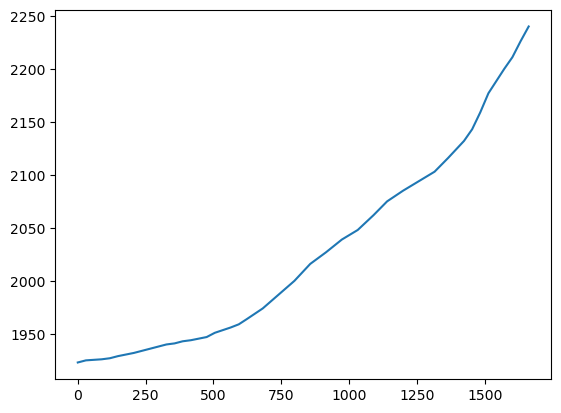

In [15]:
plt.plot(distance,elevation)

In [ ]:
chi=grid.at_node["topographic__elevation"][profiler.data_structure[6565][(6565,1046)]["ids"]]